Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
!unzip "/content/archive (3).zip"

Archive:  /content/archive (3).zip
  inflating: Housing.csv             


Loading the dataset

In [5]:
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Initial Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

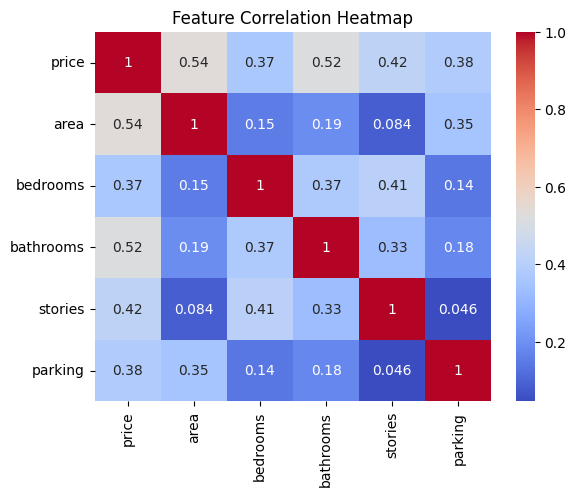

In [7]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Preprocessing

In [8]:
# Drop rows with missing target or fill if needed
df.dropna(inplace=True)

# Feature selection (example: predict price from area)
X_simple = df[['area']]  # For simple linear regression
y = df['price']

# For multiple regression
X_multi = df.drop(['price'], axis=1)


Train-Test Split

In [9]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)


Train Models

In [11]:
df.select_dtypes(include='object').columns


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

Identify categorical columns

One-Hot Encoding

In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)

spliting The data again

In [14]:
X_multi = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression().fit(X_train_m, y_train_m)

Evaluation

In [15]:
y_pred_m = model_multi.predict(X_test_m)
print("R² Score:", r2_score(y_test_m, y_pred_m))

R² Score: 0.6529242642153184


In [16]:
# Simple Regression
y_pred_s = model_simple.predict(X_test_s)
print("Simple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R²:", r2_score(y_test_s, y_pred_s))

# Multiple Regression
y_pred_m = model_multi.predict(X_test_m)
print("\nMultiple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R²:", r2_score(y_test_m, y_pred_m))


Simple Linear Regression:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R²: 0.27287851871974644

Multiple Linear Regression:
MAE: 970043.4039201636
MSE: 1754318687330.6638
R²: 0.6529242642153184


Plot Regression Line (Only for Simple Regression)

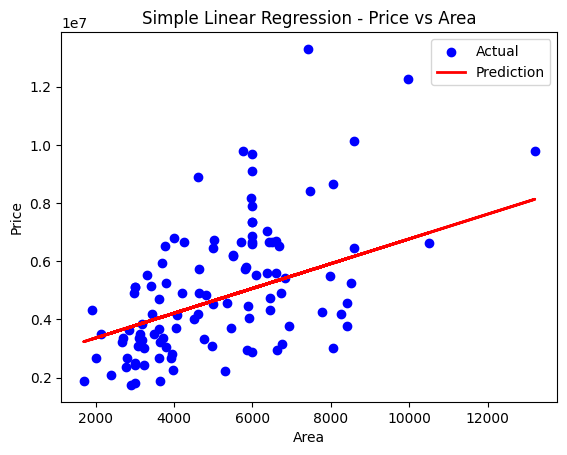

In [17]:
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Prediction')
plt.title('Simple Linear Regression - Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()


 Interpret Coefficients

In [18]:
print("Simple Regression Coeff:", model_simple.coef_, "Intercept:", model_simple.intercept_)
print("Multiple Regression Coeffs:", model_multi.coef_)


Simple Regression Coeff: [425.72984194] Intercept: 2512254.2639593435
Multiple Regression Coeffs: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
